In [1]:
import pandas as pd # Importamos Pandas con el alias de pd  (estandar) para el manejo de datos
import numpy as np # Importamos Numpy con el alias de np (estandar) para algebra lineal


# Algoritmos empleados
# ==============================================================================
import sklearn 
from sklearn import linear_model # Importamos el modelo de Regresión logistica
from sklearn.neighbors import KNeighborsClassifier # Importamos el modelo de Vecinos cercanos KNN
from sklearn import svm # Importamos el modelo de Maquinas de Soporte Vectorial SVM
from sklearn.naive_bayes import GaussianNB # Importamos el modelo de Bayes ingenuo Naives Bayes


from sklearn import model_selection # Importamos la libreria de validación de modelos
from sklearn.metrics import classification_report # Importamos la libreria de reportes de clasificación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix # Importamos la libreria de matriz de confusión
from sklearn.metrics import accuracy_score # Importamos la libreria de precisión del modelo

# Gráficos
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt # Importamos la libreria de gráficos
import seaborn as sns # Importamos la libreria de gráficos de seaborn
%matplotlib inline 

### Carga de Datos 

In [2]:
df = pd.read_csv("Clientes_Credito.csv", sep=';')
df.head()

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Acad�mico,Buen Pagador
0,1,2,4,3,1,4,1
1,2,2,3,2,1,4,1
2,3,4,1,1,4,2,2
3,4,1,4,3,1,4,1
4,5,3,3,1,3,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cliente              15 non-null     int64
 1   Monto Credito        15 non-null     int64
 2   Ingreso Neto         15 non-null     int64
 3   Coeficiente Credito  15 non-null     int64
 4   Monto Cuota          15 non-null     int64
 5   Grado Acad�mico      15 non-null     int64
 6   Buen Pagador         15 non-null     int64
dtypes: int64(7)
memory usage: 972.0 bytes


#### Estadísticas

In [4]:
df.describe()

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Acad�mico,Buen Pagador
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,2.400000,2.733333,2.533333,2.133333,2.466667,1.400000
std,4.472136,1.121224,1.032796,0.990430,0.990430,1.245946,0.507093
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.500000,1.500000,2.000000,2.000000,1.000000,1.500000,1.000000
50%,8.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000
75%,11.500000,3.000000,3.500000,3.000000,3.000000,4.000000,2.000000
max,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000


#### Correlación entre variables

In [5]:
corr_matrix = df.corr(method='pearson') # Calculamos la matriz de correlación de Pearson
corr_matrix

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Acad�mico,Buen Pagador
Cliente,1.000000e+00,-0.341882,-0.262901,0.499913,0.209641,-0.666594,5.594998e-17
Monto Credito,-3.418817e-01,1.000000,-0.394771,-0.527436,0.463114,-0.194296,5.778967e-01
Ingreso Neto,-2.629006e-01,-0.394771,1.000000,0.288625,-0.730873,0.658699,-4.637130e-01
Coeficiente Credito,4.999133e-01,-0.527436,0.288625,1.000000,-0.368932,-0.042447,-3.128841e-01
Monto Cuota,2.096411e-01,0.463114,-0.730873,-0.368932,1.000000,-0.632851,8.817642e-01
Grado Acad�mico,-6.665936e-01,-0.194296,0.658699,-0.042447,-0.632851,1.000000,-4.296049e-01
Buen Pagador,5.594998e-17,0.577897,-0.463713,-0.312884,0.881764,-0.429605,1.000000e+00


c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.draw()
C:\Users\carol\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


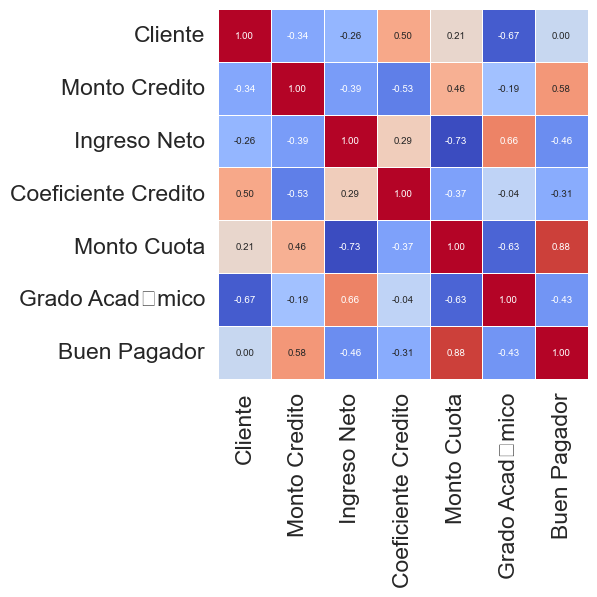

In [6]:
sns.set(font_scale=1.5) # Establecer el tamaño de la fuente
sns.heatmap(
    corr_matrix, xticklabels='auto', yticklabels='auto', cmap='coolwarm', annot=True, fmt='.2f', # Crear mapa de calor
    cbar=False, # No mostrar barra de color
    square=True, # Ajustar celdas a cuadradas
    annot_kws={'size': 7}, # Tamaño de los valores
    linewidth=.5, # Ancho de las líneas entre celdas
)

plt.show() 

In [7]:
df

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Acad�mico,Buen Pagador
0,1,2,4,3,1,4,1
1,2,2,3,2,1,4,1
2,3,4,1,1,4,2,2
3,4,1,4,3,1,4,1
4,5,3,3,1,3,2,2
5,6,3,4,3,1,4,1
6,7,4,2,1,3,2,2
7,8,4,1,3,3,2,2
8,9,3,4,3,1,3,1
9,10,1,3,2,2,4,1


#### División entrenamiento-test

In [9]:
X = df[['Monto Credito', 'Ingreso Neto', 'Coeficiente Credito', 'Monto Cuota']]
y = df['Buen Pagador']

In [10]:
print("Variables independientes:", X) 
print("\nVariable dependiente:", y)

Variables independientes:     Monto Credito  Ingreso Neto  Coeficiente Credito  Monto Cuota
0               2             4                    3            1
1               2             3                    2            1
2               4             1                    1            4
3               1             4                    3            1
4               3             3                    1            3
5               3             4                    3            1
6               4             2                    1            3
7               4             1                    3            3
8               3             4                    3            1
9               1             3                    2            2
10              3             3                    3            3
11              2             2                    2            2
12              2             2                    3            2
13              1             3                   

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [12]:
from sklearn.preprocessing import StandardScaler # Importamos la libreria de escalado de características
sc = StandardScaler() # Creamos el objeto de escalado
X_train = sc.fit_transform(X_train) # Escalamos las características de entrenamiento
X_test = sc.transform(X_test)

In [13]:
print("\nX Entrenamiento:",X_train) 
print("\ny test:",y_test)


X Entrenamiento: [[-1.2768848  -0.59587957  1.32287566 -0.28347335]
 [ 0.59587957  0.34050261 -1.79533125  0.75592895]
 [ 1.53226176 -1.53226176 -1.79533125  1.79533125]
 [-1.2768848   0.34050261  1.32287566  0.75592895]
 [ 0.59587957  0.34050261  0.28347335  0.75592895]
 [ 1.53226176 -1.53226176  0.28347335  0.75592895]
 [-0.34050261 -0.59587957 -0.75592895 -0.28347335]
 [-1.2768848   1.2768848   0.28347335 -1.32287566]
 [-0.34050261  1.2768848   0.28347335 -1.32287566]
 [ 0.59587957  1.2768848   0.28347335 -1.32287566]
 [-0.34050261 -0.59587957  0.28347335 -0.28347335]]

y test: 1    1
6    2
8    1
9    1
Name: Buen Pagador, dtype: int64


### Máquinas de Soporte Vectorial (SVM)

In [14]:
modelo_svc = svm.SVC(kernel="linear")

In [15]:
modelo_svc.fit(X_train, y_train)

SVC(kernel='linear')

#### Validación del modelo

In [16]:
y_pred = modelo_svc.predict(X_test) # Predecimos con el modelo de Maquinas de Soporte Vectorial SVM
#Muestro las 5 primeras predicciones
print(y_pred[0:5])

[1 2 1 1]


In [17]:
algoritmo = 'Máquinas de Soporte Vectorial (SVM)'
# Calculo score del modelo con el set de entrenamiento
train_score = modelo_svc.score(X_train, y_train)
# Calculo score del modelo con el set de prueba
test_score = modelo_svc.score(X_test, y_test)

print("{} precisión del set de entrenamiento: {}".format(algoritmo, train_score))
print("{} precisión del set de prueba: {}".format(algoritmo, test_score))

Máquinas de Soporte Vectorial (SVM) precisión del set de entrenamiento: 1.0
Máquinas de Soporte Vectorial (SVM) precisión del set de prueba: 1.0


### Matriz de confusión

In [18]:
cm = confusion_matrix(y_test, y_pred)

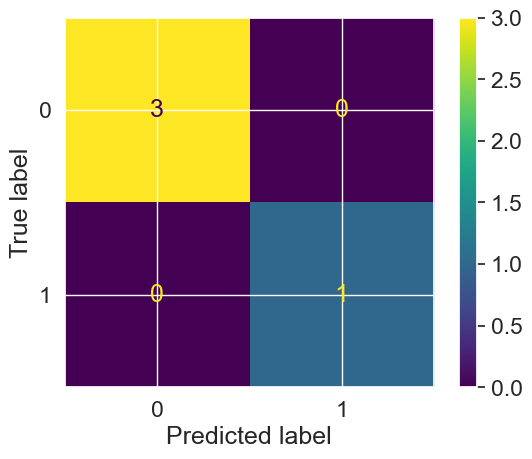

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay # Importamos la libreria de visualización de matriz de confusión
disp= ConfusionMatrixDisplay (confusion_matrix=cm)  # Creamos el objeto de visualización de matriz de confusión
disp.plot() # Mostramos la matriz de confusión
plt.show() # Mostramos el gráfico

### Predicción con usuarios ficticios

In [25]:
clientes_ficticios = pd.DataFrame({'Monto Credito': [4, 1, 3, 4, 3, 1, 3],
                                  'Ingreso Neto': [4, 4, 2, 1, 4, 3, 3],
                                  'Coeficiente Credito': [2, 3, 3, 3, 3, 2, 3],
                                  'Monto Cuota': [3, 4, 2, 2, 3, 4, 1]})

predicciones = modelo_svc.predict(clientes_ficticios)

c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [27]:
for num, prediccion in enumerate(predicciones):
    if prediccion == 1:
        print(f"El cliente {num+100}: Buen pagador")
    else:
        print(f"El cliente {num+100}: No es un buen pagador")

El cliente 100: No es un buen pagador
El cliente 101: No es un buen pagador
El cliente 102: No es un buen pagador
El cliente 103: No es un buen pagador
El cliente 104: No es un buen pagador
El cliente 105: No es un buen pagador
El cliente 106: No es un buen pagador
